<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week10_NeuralNetworks_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10
# An Introduction to Neural Networks

**Training large neural networks requires a lot of calculation.** Please turn on GPU computing from "Edit" -> "Notebook Setting" -> "Hardware Acceleration" before running the code below.

# Build a Classifier for Hand-Written Digits

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

*Readings: Chapter 10 Introduction to Artificial Neural Networks with Keras*

In [1]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.9.2


In [2]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Shape of the image: (28, 28)


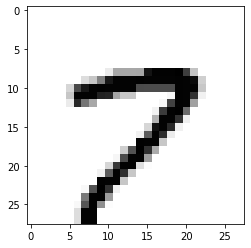

In [4]:
# extract the first image in x_train
idx = 123
img = x_train[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap="Greys")

In [5]:
print("Shape of y_train:", y_train.shape)
y_train[idx]

Shape of y_train: (60000,)


7

Now let's build a neural network model.

In [7]:
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

- The first line creates a `Sequential` model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
-Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is simply to convert each input image into a 1D array
- Next we add a Dense hidden layer with 128 neurons. It will use the ReLU activation function.
- Next we add a second Dense hidden layer with 128 neurons, also using the ReLU
activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using `softmax` activation function.


In [ ]:
# For each example the model returns a vector of "logits", one for each class.
index = 1234
probs = model(x_train[index:index+2]) # The input to this model should be an array of images. It should be a 3D array.
print(probs)

tf.Tensor(
[[0.08  0.116 0.087 0.066 0.153 0.134 0.107 0.071 0.051 0.135]
 [0.106 0.09  0.08  0.066 0.132 0.139 0.093 0.078 0.062 0.155]], shape=(2, 10), dtype=float32)


In [ ]:
# We should make sure that the input is a 3D array.
# x_train[index].shape              # Shape: (28, 28) X
# x_train[index:index+1].shape      # Shape: (1, 28, 28) V
# temp = np.array([x_train[index]]) # Shape: (1, 28, 28) V

In [ ]:
# probs represents a probability distribution
print(np.sum(probs))

2.0


In [ ]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

4


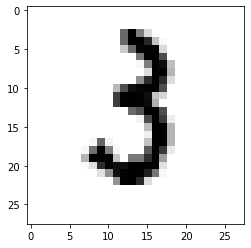

In [ ]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

The prediction accuracy is low, since no training has been performed yet. Let's introduce a function that measures the prediction error.

In [9]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss_fn(y_train[index:(index+2)], probs).numpy()

NameError: ignored

In [ ]:
# The cross-entropy loss is 0 if the output distribution is the same as the ground truth label
correct_label = y_train[index]
correct_probability_distribution = np.array([0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0])
loss_fn(correct_label, correct_probability_distribution).numpy()

very_wrong_distribution = np.array([0.5, 0.3, 0.2, 0, 0, 0, 0, 0, 0, 0])
loss_fn(correct_label, very_wrong_distribution).numpy()

16.118096350958076

In [10]:
# Set up the training environment
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Understand the number of parameters
# The first dense layer has 784 * 128 connections with the input layer
print("First dense layer:")
print("# of weight parameters:", 784 * 128)
print("# of bias parameters:", 128)
print("Total:", 784 * 128 + 128)

print('=' * 30)
print("Second dense layer:")
print("# of weight parameters:", 128 * 128)
print("# of bias parameters:", 128)
print("Total:", 128 * 128 + 128)

print('=' * 30)
print("Third dense layer:")
print("# of weight parameters:", 128 * 10)
print("# of bias parameters:", 10)
print("Total:", 128 * 10 + 10)

First dense layer:
# of weight parameters: 100352
# of bias parameters: 128
Total: 100480
Second dense layer:
# of weight parameters: 16384
# of bias parameters: 128
Total: 16512
Third dense layer:
# of weight parameters: 1280
# of bias parameters: 10
Total: 1290


In [12]:
# The Model.fit method adjusts the model parameters to minimize the loss
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6468 - accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2437 - accuracy: 0.9303
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2094 - accuracy: 0.9398
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1841 - accuracy: 0.9469
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1647 - accuracy: 0.9524
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1489 - accuracy: 0.9570
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9610
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1245 - accuracy: 0.9643
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.115

The `fit()` method returns a `History` object containing
- the training parameters (`history.params`), 
- the list of epochs it went through (`history.epoch`), 
- a dictionary (`history.history`) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set

In [13]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [14]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
history.history

{'loss': [0.6467854380607605,
  0.2969343364238739,
  0.24372079968452454,
  0.20940661430358887,
  0.1841200888156891,
  0.16469746828079224,
  0.14887024462223053,
  0.1356145292520523,
  0.12450359016656876,
  0.11524232476949692],
 'accuracy': [0.8308166861534119,
  0.9140833616256714,
  0.9302833080291748,
  0.9398499727249146,
  0.9469166398048401,
  0.9524166584014893,
  0.9570333361625671,
  0.9610000252723694,
  0.9643166661262512,
  0.9670000076293945]}

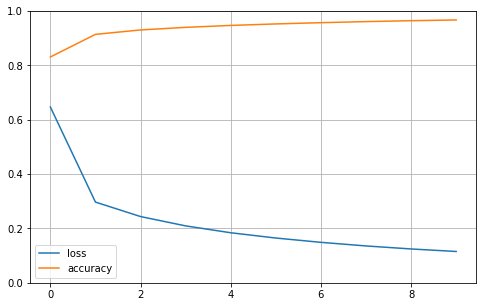

In [16]:
# Visualize the training process
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim([0, 1]) # set the vertical range to [0-1]
plt.show()

In [17]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9652


[0.11913841217756271, 0.9652000069618225]

In [20]:
# Obtain the predictions on the test set
predictions = model.predict(x_test)
print(predictions[0:2, :])

313/313 [==============================] - 1s 2ms/step
[[0.    0.    0.001 0.006 0.    0.    0.    0.993 0.    0.   ]
 [0.    0.001 0.985 0.012 0.    0.002 0.    0.    0.    0.   ]]


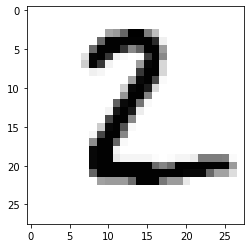

In [22]:
plt.imshow(x_test[1, :, :], cmap="Greys")

In [23]:
# Convert probability distributions to class predictions
classes = np.argmax(predictions, axis=1) # axis=0 finds the largest value in each column
                                         # axis=1 finds the largest value in each row
print(classes)

[7 2 1 ... 4 5 6]


In [24]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, classes)
print(mat)

[[ 966    0    1    0    0    5    4    2    2    0]
 [   0 1121    2    1    0    1    4    0    6    0]
 [   6    2  996    8    1    1    3    7    8    0]
 [   0    1    4  976    1    9    0    8    9    2]
 [   1    0    5    0  952    0    7    1    2   14]
 [   5    1    1   10    2  856    7    0    6    4]
 [  10    3    0    0    7   11  923    0    4    0]
 [   0    8   14    4    2    1    0  984    0   15]
 [   4    2    2   12    4    7    6    5  929    3]
 [   4    8    0   11   18    2    1   10    6  949]]


In [26]:
# How can we find those image of 9's that are mistaken for 4's?
idxs = []
for ind in range(len(y_test)):
    if y_test[ind] == 9 and classes[ind] == 4:
        idxs.append(ind)
print(idxs)

[1232, 1901, 2414, 2720, 2760, 2863, 3869, 3985, 4000, 4093, 4369, 4425, 4735, 4823, 4918, 6568, 9587, 9808]


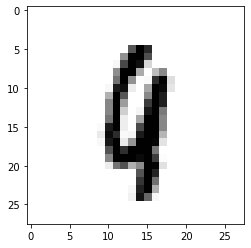

Press anything to continue


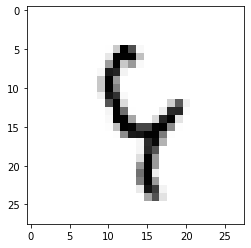

Press anything to continue


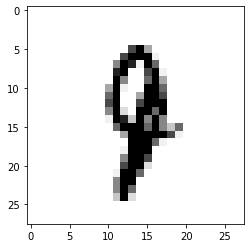

Press anything to continue


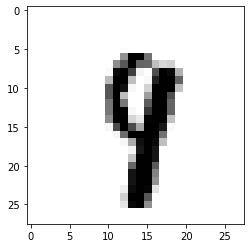

Press anything to continue


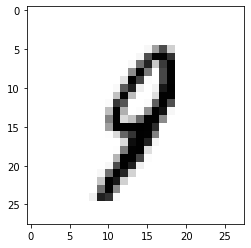

Press anything to continue


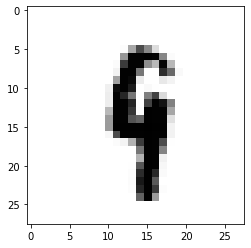

Press anything to continue


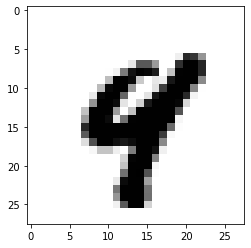

Press anything to continue


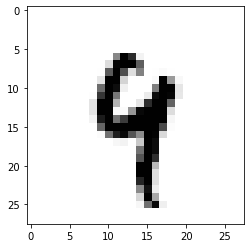

Press anything to continue


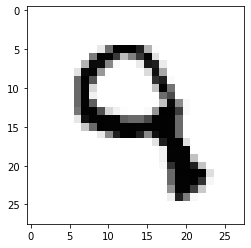

Press anything to continue


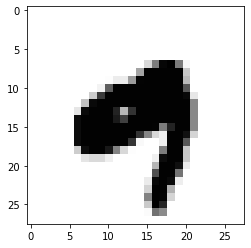

Press anything to continue


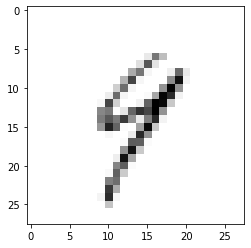

Press anything to continue


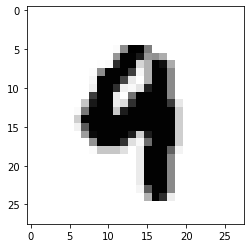

Press anything to continue


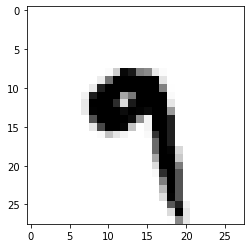

Press anything to continue


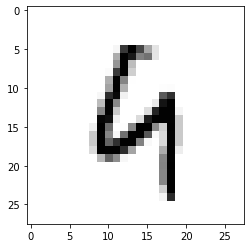

Press anything to continue


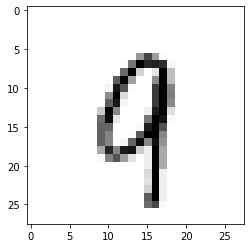

Press anything to continue


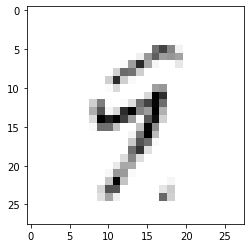

Press anything to continue


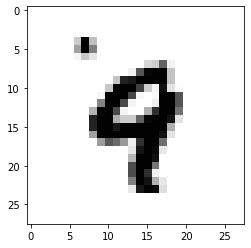

Press anything to continue


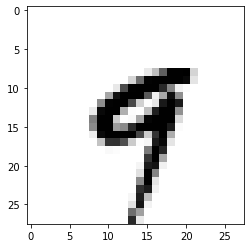

Press anything to continue


In [28]:
for ind in idxs:
    plt.imshow(x_test[ind, :, :], cmap="Greys")
    plt.show()
    input("Press anything to continue")

The image classifier is now trained to ~98% accuracy on this dataset. Let's create a test case ourselves. For example, we can use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

Upload the image to Colab environment by clicking the "Upload to Session Storage" button in the File tab on the left.

In [81]:
# import pillow for image transformation
import PIL
from PIL import ImageOps
img = PIL.Image.open("Test04.png")
# img = img.convert('1') # Use grey scale to represent the colors
img = ImageOps.grayscale(img)
print(img.size)

(28, 28)


(28, 28)


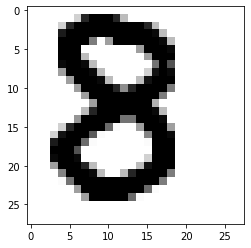

In [82]:
# Convert the image to the proper format
ary = np.array(img) / 255.0
print(ary.shape)

ary = 1 - ary # We need to switch 0 and 1
plt.imshow(ary, cmap="Greys") 

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   

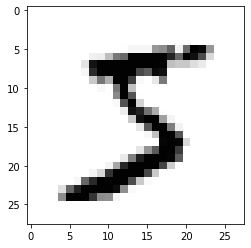

In [69]:
# plt.imshow(1 - ary, cmap="Greys")
plt.imshow(x_train[0, :, :], cmap="Greys")
x_train[0, :, :]

In [83]:
# Obtain predictions from the model
predictions = model.predict(ary.reshape(1, 28, 28))
print(predictions)

1/1 [==============================] - 0s 15ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


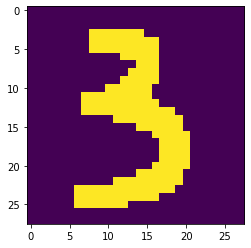

In [76]:
# np.array([ary])
plt.imshow(ary)

In [84]:
# Save a model
model.save("my_keras_model.h5")

In [86]:
# Where is this file stored?
import os
os.getcwd()

'/content'

In [85]:
# Restore a model
model = tf.keras.models.load_model("my_keras_model.h5")

In [91]:
# Inspect model's parameters
weights, biases = model.layers[2].weights
print(weights.shape, biases.shape)

(128, 128) (128,)


# Exercise 1: Are larger models better?
Modify the neural network model in one of the following ways:
1. Increate the number of neurons from 128 to 256.
2. Add another layer of 128 nodes.
Report the accuracy and the confusion matrix on the test set.



In [92]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

In [95]:
model2.compile(optimizer='sgd', loss=loss_fn, metrics=['accuracy'])

In [96]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5994 - accuracy: 0.8441
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2294 - accuracy: 0.9345
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1944 - accuracy: 0.9440
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9512
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1486 - accuracy: 0.9573
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1330 - accuracy: 0.9624
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9654
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9685
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.100

In [97]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1051 - accuracy: 0.9681


[0.10506003350019455, 0.9681000113487244]

In [98]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

In [99]:
model3.compile(optimizer='sgd', loss=loss_fn, metrics=['accuracy'])

In [100]:
model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6070 - accuracy: 0.8342
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9250
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9417
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1645 - accuracy: 0.9520
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1387 - accuracy: 0.9602
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1196 - accuracy: 0.9651
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9695
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0931 - accuracy: 0.9725
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9759
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.074

In [101]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9707


[0.09492892026901245, 0.9707000255584717]

In [102]:
# What if we train the first longer?
# At first both training acc and validation acc are improved
# Then only training acc continues to rise. We should stop at this point to avoid overfitting the training data.
model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1008 - accuracy: 0.9716 - val_loss: 0.0745 - val_accuracy: 0.9800
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9735 - val_loss: 0.0785 - val_accuracy: 0.9810
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9752 - val_loss: 0.0739 - val_accuracy: 0.9822
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0831 - accuracy: 0.9762 - val_loss: 0.0731 - val_accuracy: 0.9813
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0782 - accuracy: 0.9786 - val_loss: 0.0704 - val_accuracy: 0.9813
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.0734 - val_accuracy: 0.9797
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0699 - accuracy: 0.9807 - val_loss: 0.0721 - val_accuracy:

In [103]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9783


[0.0739297941327095, 0.9782999753952026]

**In which ways can one modify a neural network model?**

## Exercise 2: Train a Neural Network That Learns the XOR Operation